In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("data/covid_grouped.csv")

df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek + 1
df["week_count"] = -1

df["new_count"] = df["new_count"].astype(int)

df = df[(df["date"] >= "2020-03-01") & (df["date"] <= "2021-07-31")]

In [3]:
week_count = 0

for i in range(len(df)):
    if df.iloc[i]["day_of_week"] == 1:
        week_count += 1
    df.iloc[i, df.columns.get_loc('week_count')] = week_count

In [4]:
df.head(10)

,date,new_count,day_of_week,week_count
0,2020-03-01,0,7,0
1,2020-03-02,0,1,1
2,2020-03-03,0,2,1
3,2020-03-04,1,3,1
4,2020-03-05,1,4,1
5,2020-03-06,3,5,1
6,2020-03-07,0,6,1
7,2020-03-08,0,7,1
8,2020-03-09,7,1,2
9,2020-03-10,12,2,2


In [5]:
df.tail(10)

,date,new_count,day_of_week,week_count
506,2021-07-22,233,4,73
507,2021-07-23,279,5,73
508,2021-07-24,214,6,73
509,2021-07-25,177,7,73
510,2021-07-26,178,1,74
511,2021-07-27,253,2,74
512,2021-07-28,286,3,74
513,2021-07-29,269,4,74
514,2021-07-30,332,5,74
515,2021-07-31,256,6,74


In [6]:
weeks_max = df.groupby("week_count").max("new_count").reset_index()
weeks_min = df.groupby("week_count").min("new_count").reset_index()

In [7]:
print("Maximum COVID-19 Cases:")

count =  []

for i in range(len(weeks_max)):
    day_of_week = int(df[(df["week_count"] == int(weeks_max.iloc[i]["week_count"])) &
                         (df["new_count"] == int(weeks_max.iloc[i]["new_count"]))].iloc[0]["day_of_week"])
    count.append(day_of_week)

pd.Series(count).value_counts()

Maximum COVID-19 Cases:


5    26
4    20
3    16
6     6
7     3
1     2
2     2
dtype: int64

In [8]:
print("Minimum COVID-19 Cases:")

count =  []

for i in range(len(weeks_min)):
    day_of_week = int(df[(df["week_count"] == int(weeks_min.iloc[i]["week_count"])) &
                         (df["new_count"] == int(weeks_min.iloc[i]["new_count"]))].iloc[0]["day_of_week"])
    count.append(day_of_week)

pd.Series(count).value_counts()

Minimum COVID-19 Cases:


7    30
1    24
2    10
6     7
3     3
5     1
dtype: int64

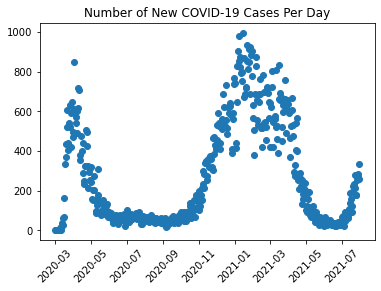

In [9]:
x = df["date"].to_list()
y = df["new_count"].to_list()

fig, ax = plt.subplots()

plt.title("Number of New COVID-19 Cases Per Day")
plt.xticks(rotation=45)

ax.plot(x, y, 'o')

plt.show()